## Climatology

In [1]:
import numpy as np
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
from copy import copy
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import warnings
warnings.filterwarnings("ignore")

In [2]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [3]:
yr = '2004'
dirread_NEMO = '/data/oceanparcels/input_data/NEMO-MEDUSA/ORCA0083-N006/means/'
tsfiles_NEMO = sorted(glob(dirread_NEMO+'ORCA0083-N06_'+yr+'*d05T.nc'))
ds_ts_NEMO = xr.open_dataset(tsfiles_NEMO[0])

In [4]:
region='SO'

In [5]:
climatology = np.load('/data/oceanparcels/output_data/data_Reint/'+region+'_climatology.npy')

In [6]:
D_profile = climatology[0]
PP_profile = climatology[1]
kpp_profile = climatology[2]

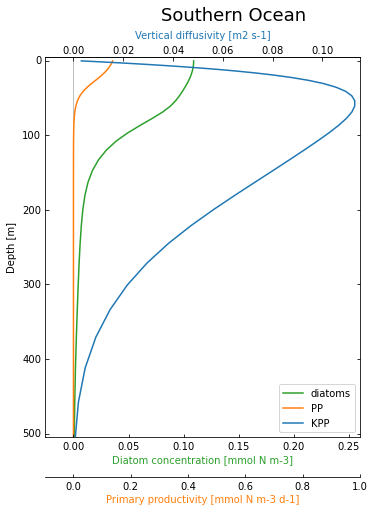

In [7]:
fig = plt.figure(figsize=(7,7), constrained_layout=True)
fig.suptitle(regions[region], fontsize=18)

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twiny()
par2 = host.twiny()

offset = 40
new_fixed_axis = par1.get_grid_helper().new_fixed_axis
par1.axis["bottom"] = new_fixed_axis(loc="bottom",
                                    axes=par1,
                                    offset=(0, -offset))

par1.axis["bottom"].toggle(all=True)
par1.axis["top"].toggle(all=False)
par2.axis["top"].toggle(all=True)

host.set_ylim(505, -5)
# host.set_ylim(205, -5)

host.set_xlabel("Diatom concentration [mmol N m-3]")
host.set_ylabel("Depth [m]")
par1.set_xlabel("Primary productivity [mmol N m-3 d-1]")
par2.set_xlabel("Vertical diffusivity [m2 s-1]")

p1, = host.plot(D_profile, ds_ts_NEMO['deptht'], c='tab:green', label='diatoms')
p2, = par1.plot(PP_profile, ds_ts_NEMO['deptht'], c='tab:orange', label='PP')
p3, = par2.plot(kpp_profile, ds_ts_NEMO['deptht'], c='tab:blue', label='KPP')

host.set_xlim(-0.026,0.26)
par1.set_xlim(-0.1,1)
par2.set_xlim(-0.0115,0.115)

host.vlines(0,-10,210,color='silver',linewidth=1)
host.legend(loc = 'lower right')

host.axis["bottom"].label.set_color(p1.get_color())
par1.axis["bottom"].label.set_color(p2.get_color())
par2.axis["top"].label.set_color(p3.get_color())


In [8]:
climatology_SO = np.load('/data/oceanparcels/output_data/data_Reint/SO_climatology.npy')
climatology_EqPac = np.load('/data/oceanparcels/output_data/data_Reint/EqPac_climatology.npy')
climatology_NPSG = np.load('/data/oceanparcels/output_data/data_Reint/NPSG_climatology.npy')

In [9]:
kpp_profile0 = climatology_EqPac[2]
kpp_profile1 = climatology_NPSG[2]
kpp_profile2 = climatology_SO[2]

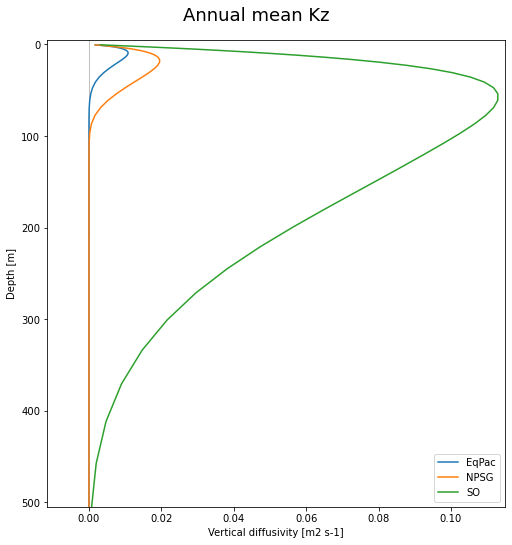

In [10]:
fig = plt.figure(figsize=(7,7), constrained_layout=True)
fig.suptitle('Annual mean Kz', fontsize=18, y=1.06)

ax=plt.axes()

ax.set_ylim(505, -5)

ax.set_xlabel("Vertical diffusivity [m2 s-1]")
ax.set_ylabel("Depth [m]")

ax.plot(kpp_profile0, ds_ts_NEMO['deptht'], label='EqPac')
ax.plot(kpp_profile1, ds_ts_NEMO['deptht'], label='NPSG')
ax.plot(kpp_profile2, ds_ts_NEMO['deptht'], label='SO')

ax.set_xlim(-0.0115,0.115)

ax.vlines(0,-10,210,color='silver',linewidth=1)
ax.legend(loc = 'lower right')
